In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

salary = pd.read_csv("C:/Users/Vinny/Desktop/Vinny/School/Team-Anova-Project/Vinny_WIP/salary_data_states.csv")

salary.head()

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",6217100.0,year,62171.0,year,SOFTWARE ENGINEER,...,"Software Developers, Applications",Illinois,IL,NaN,y,H-1B,NaN,62171.0,software engineer,1
1,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,5067600.0,year,91440.0,year,Assistant Professor of Marketing,...,"Business Teachers, Postsecondary",California,CA,94132.0,NaN,greencard,NaN,91440.0,assistant professor,2
2,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,4947000.0,year,49470.0,year,SPECIAL EDUCATION TEACHER,...,"Special Education Teachers, Kindergarten and E...",California,CA,NaN,y,H-1B,NaN,49470.0,teacher,3
3,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,251052.0,month,43800.0,year,SCIENCE TEACHER,...,"Biological Science Teachers, Postsecondary",Texas,TX,NaN,y,H-1B,NaN,43800.0,teacher,4
4,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,84573.0,bi-weekly,170000.0,year,SENIOR SOFTWARE ENGINEER,...,"Software Developers, Systems Software",Oregon,OR,NaN,y,E-3 Australian,NaN,170000.0,software engineer,5


## What states (of those I am willing to move to) have the highest paying data-related salaries?

In [12]:
relevant_states = ['California', 'New York', 'Georgia', 'Maine', 'New Hampshire','New Jersey', 
                   'Virginia', 'Oregon', 'Hawaii', 'Pennsylvania', 'Vermont', 
                   'Maryland', 'Illinois', 'Texas','Washington']

# get the averages pf the data analyst and data scientist salaries together
datasal = salary.loc[salary['JOB_TITLE_SUBGROUP'].isin(['data analyst', 'data scientist'])]

#filter out the irrelevant states
datasal_fil = datasal[datasal['WORK_STATE'].isin(relevant_states)]

top_states = datasal_fil.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].mean().round(2).sort_values(ascending=False).reset_index()

top_states.columns =  ['State', 'Average Salary']

top_states_overall = datasal.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].mean().round(2).sort_values(ascending=False).reset_index().head(10)
top_states_overall.columns =  ['State', 'Average Salary']

top_states_overall

,State,Average Salary
0,California,99190.31
1,Washington,96887.08
2,Connecticut,81928.39
3,New York,81722.32
4,Utah,81707.51
5,Massachusetts,79960.73
6,District of Columbia,79758.17
7,Delaware,78561.14
8,Arizona,78219.66
9,New Hampshire,75943.25


In [6]:
# get the averages pf the data analyst and data scientist salaries together
bottom_states = datasal.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].mean().round(2).sort_values(ascending=False).reset_index().tail(10)
bottom_states.columns =  ['State', 'Average Salary']

bottom_states

,State,Average Salary
38,Arkansas,62376.48
39,Florida,62016.61
40,South Carolina,61402.00
41,Louisiana,59692.31
42,Oklahoma,55498.40
43,Nebraska,52010.07
44,Idaho,48699.75
45,North Dakota,47714.67
46,Puerto Rico,45000.00
47,Vermont,42000.00


## What are the differences between job sub-categories?

In [3]:
salary.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].mean().round(2)


JOB_TITLE_SUBGROUP
assistant professor       94876.71
attorney                 146413.60
business analyst          71300.08
data analyst              70030.08
data scientist           108021.04
management consultant    108251.33
software engineer         92505.30
teacher                   46039.99
Name: PAID_WAGE_PER_YEAR, dtype: float64

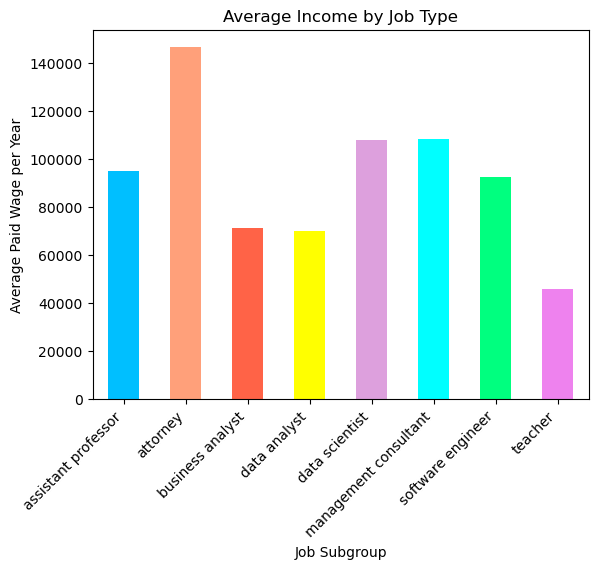

In [3]:
colors = ['deepskyblue','lightsalmon', 'tomato', 'yellow', 'plum', 'aqua', 'springgreen', 'violet']

grouped_data = salary.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].mean()

grouped_data.plot(kind='bar', color=colors)

plt.title('Average Income by Job Type')
plt.xlabel('Job Subgroup')
plt.ylabel('Average Paid Wage per Year')
plt.xticks(rotation=45, ha='right')
plt.show()

## Which companies have the highest salaries for those sub-types?

##### Data Scientist

In [6]:
sciensal = salary.loc[salary['JOB_TITLE_SUBGROUP']=='data scientist']

sciensal2 = sciensal.copy()

sciensal2['EMPLOYER_NAME'] = sciensal2['EMPLOYER_NAME'].replace({'360I, LLC': '360I LLC'})

data_scientist = sciensal2.groupby('EMPLOYER_NAME')['PAID_WAGE_PER_YEAR'].mean().round(2).sort_values(ascending=False).head(5)

print(data_scientist)

EMPLOYER_NAME
NETFLIX                                   220000.0
THE PNC FINANCIAL SERVICES GROUP, INC.    205000.0
ADOBE SYSTEMS INCORPORATED                181667.0
THE MATLEN SILVER GROUP, INC.             176800.0
BED BATH AND BEYOND, INC.                 175000.0
Name: PAID_WAGE_PER_YEAR, dtype: float64


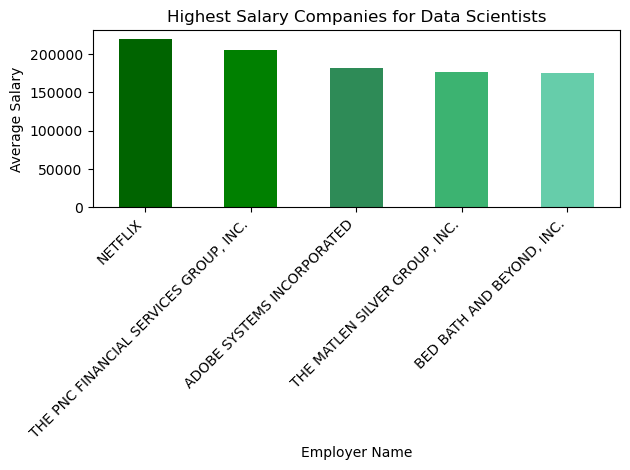

In [7]:
colors = ['darkgreen','green','seagreen','mediumseagreen','mediumaquamarine']
data_scientist.plot(kind='bar', color=colors)
plt.title('Highest Salary Companies for Data Scientists')
plt.xlabel('Employer Name')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### Data Analyst

In [58]:
anasal = salary.loc[salary['JOB_TITLE_SUBGROUP']=='data analyst']

data_analyst = anasal.groupby('EMPLOYER_NAME')['PAID_WAGE_PER_YEAR'].mean().round(2).sort_values(ascending=False).head(5)
print(data_analyst)

EMPLOYER_NAME
INTUIT                    433161.50
KNOWLEDGENT GROUP INC.    185000.00
NETFLIX, INC.             177355.25
AVISO, INC.               165000.00
FIRST REPUBLIC BANK       160000.00
Name: PAID_WAGE_PER_YEAR, dtype: float64


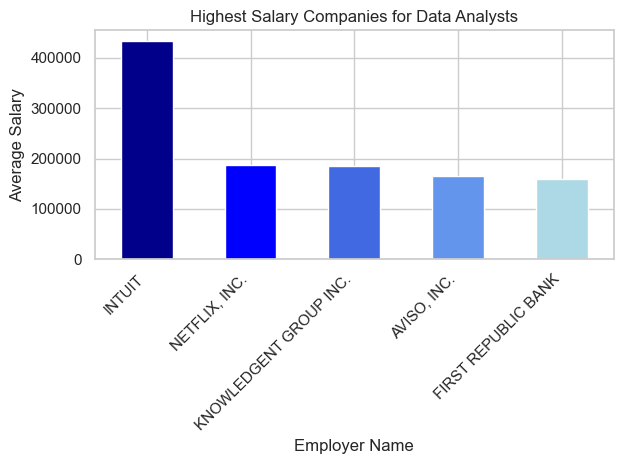

In [57]:
colors = ['darkblue','blue','royalblue','cornflowerblue','lightblue']
data_analyst.plot(kind='bar', color=colors)
plt.title('Highest Salary Companies for Data Analysts')
plt.xlabel('Employer Name')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Attorney

In [16]:
attsal = salary.loc[salary['JOB_TITLE_SUBGROUP']=='attorney']

attsal2 = attsal.copy()

attsal2['EMPLOYER_NAME'] = attsal2['EMPLOYER_NAME'].replace({'81DOCCOM INC.': '81DOC.COM INC.'})

attorney = attsal2.groupby('EMPLOYER_NAME')['PAID_WAGE_PER_YEAR'].mean().round(2).sort_values(ascending=False).head(5)

print(attorney)

EMPLOYER_NAME
HUGHES HUBBARD & REED LLP               2400000.00
RUFUS-ISAACS, ACLAND & GRANTHAM, LLP     624000.00
WINSTON & STRAWN LLP                     496666.64
PROSKAUER ROSE LLP                       310000.00
DEWEY & LEBOEUF LLP                      300000.00
Name: PAID_WAGE_PER_YEAR, dtype: float64


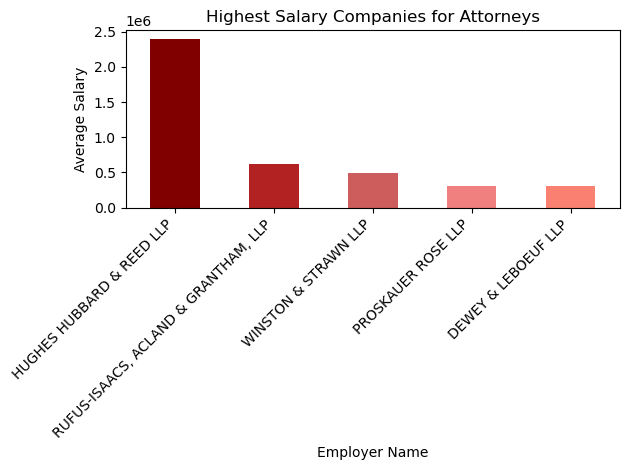

In [17]:
colors = ['maroon','firebrick','indianred','lightcoral','salmon']
attorney.plot(kind='bar', color=colors)
plt.title('Highest Salary Companies for Attorneys')
plt.xlabel('Employer Name')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Will the answer change if I take standard of living into account?

In [13]:
# Cost of Living sourced from https://meric.mo.gov/data/cost-living-data-series

col_dict = {
    'California': 136.4,
    'New York': 126.5,
    'Georgia': 90.9,
    'Maine': 110.7,
    'New Hampshire': 115.6,
    'New Jersey': 110.3,
    'Virginia': 101.4,
    'Oregon': 114.7,
    'Hawaii': 179.2,
    'Pennsylvania': 94.8,
    'Puerto Rico': None,
    'Vermont': 114.9,
    'Maryland': 114.8,
    'Illinois': 91.8,
    'Texas': 93.0,
    'Washington': 115.7}


top_states = pd.merge(top_states, pd.DataFrame(list(col_dict.items()), columns=['State', 'Cost of Living Index']), on='State', how='left')


In [20]:
top_states['COL Ratio'] = (top_states['Average Salary']/top_states['Cost of Living Index']).round(2)

tst=top_states.sort_values(by='COL Ratio',ascending=False)
tst

#higher is better

,State,Average Salary,Cost of Living Index,COL Ratio
1,Washington,96887.08,115.7,837.40
6,Georgia,72325.67,90.9,795.66
11,Illinois,66909.28,91.8,728.86
0,California,99190.31,136.4,727.20
10,Texas,67483.28,93.0,725.63
13,Pennsylvania,66120.19,94.8,697.47
9,Virginia,68407.99,101.4,674.64
3,New Hampshire,75943.25,115.6,656.95
5,Maine,72595.25,110.7,655.78
4,Oregon,75016.47,114.7,654.02


C:\Users\Vinny\AppData\Local\Temp\ipykernel_24724\105671745.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


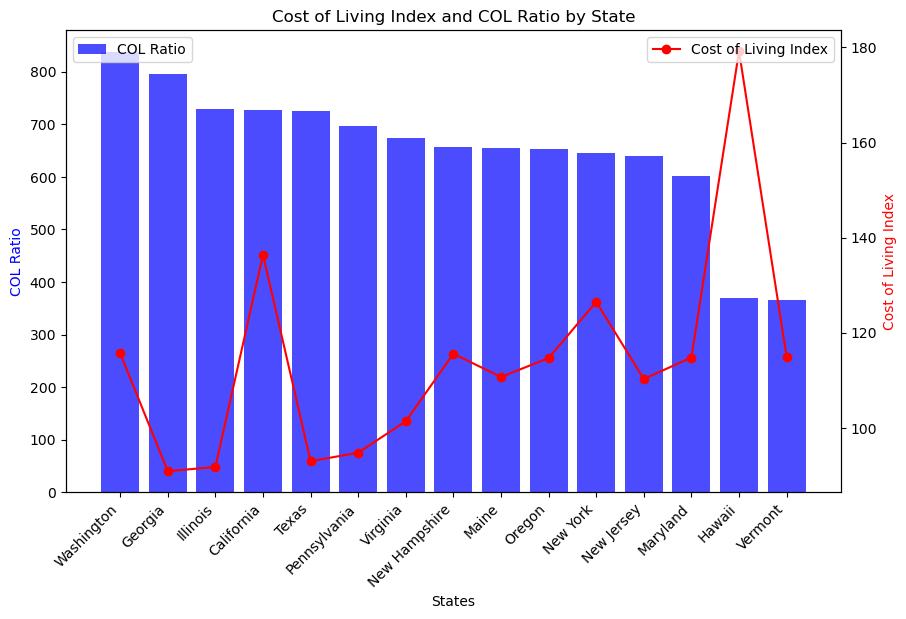

In [21]:
tst.set_index('State', inplace=True)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 'COL Ratio' as bars on the primary y-axis
ax1.bar(tst.index, tst['COL Ratio'], alpha=0.7, label='COL Ratio', color='blue')

# Create a secondary y-axis for 'Cost of Living Index'
ax2 = ax1.twinx()
ax2.plot(tst.index, tst['Cost of Living Index'], label='Cost of Living Index', color='red', marker='o')

# Set labels and title
ax1.set_ylabel('COL Ratio', color='blue')
ax2.set_ylabel('Cost of Living Index', color='red')
ax1.set_xlabel('States')
ax1.set_title('Cost of Living Index and COL Ratio by State')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Display legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.show()

From this output it appears that the most worth it state to live in if you work a data job, is in Washington, since it has the highest Cost of Living to Average Salary Ratio. This makes me feel more comfortable living in California, as Data Analysts and Scientists don't seem to be as appreciated financially elsewhere in the country.

